In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [4]:
api_key=os.getenv("GOOGLE_API_KEY")

In [5]:
model=ChatGoogleGenerativeAI(model="gemini-2.5-pro",google_api_key=api_key)

In [6]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [10]:
def create_outline(state: BlogState) -> BlogState:

    ## Fetch title
    title = state['title']

    ## Call LLM and generare outline
    prompt=f"generate a outline for a blog on the topic {title}"
    outline=model.invoke(prompt).content

    ## Update state
    state['outline'] = outline

    return state

In [11]:
def create_blog(state: BlogState)-> BlogState:

    title=state['title']
    outline=state['outline']

    prompt=f"Write a detail blog on the title using the following outline \n {outline}"

    content=model.invoke(prompt).content

    state['content']=content

    return state

In [13]:
graph=StateGraph(BlogState)

## Add nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

## Add Edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

## Compile
workflow=graph.compile()

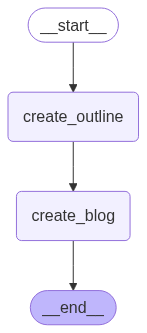

In [14]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [15]:
initial_state={'title':"Rise of  AI in india"}
final_state=workflow.invoke(initial_state)
print(final_state)

{'title': 'Rise of  AI in india', 'outline': 'Of course! Here is a comprehensive outline for a blog post on the topic "The Rise of AI in India." This structure is designed to be logical, engaging, and easy for a writer to flesh out into a full article.\n\n---\n\n### **Blog Post Outline: The Rise of AI in India**\n\n**Target Audience:** Tech enthusiasts, business leaders, policymakers, students, and the general public interested in India\'s growth story.\n\n**Goal:** To provide a comprehensive overview of the AI landscape in India, covering its drivers, applications, key players, challenges, and future potential.\n\n---\n\n### **1. Title (Choose one or create a variation):**\n\n*   India\'s AI Ascent: From Code to a Trillion-Dollar Dream\n*   Decoding the Rise of AI in India: A New Digital Dawn\n*   The AI Revolution: How India is Building its Intelligent Future\n*   Beyond the Hype: The Real Impact of AI in India\n\n---\n\n### **2. Introduction (The Hook)**\n\n*   **Opening:** Start wi

In [16]:
print(final_state['outline'])

Of course! Here is a comprehensive outline for a blog post on the topic "The Rise of AI in India." This structure is designed to be logical, engaging, and easy for a writer to flesh out into a full article.

---

### **Blog Post Outline: The Rise of AI in India**

**Target Audience:** Tech enthusiasts, business leaders, policymakers, students, and the general public interested in India's growth story.

**Goal:** To provide a comprehensive overview of the AI landscape in India, covering its drivers, applications, key players, challenges, and future potential.

---

### **1. Title (Choose one or create a variation):**

*   India's AI Ascent: From Code to a Trillion-Dollar Dream
*   Decoding the Rise of AI in India: A New Digital Dawn
*   The AI Revolution: How India is Building its Intelligent Future
*   Beyond the Hype: The Real Impact of AI in India

---

### **2. Introduction (The Hook)**

*   **Opening:** Start with a powerful statistic or a relatable anecdote.
    *   *Example Stat:

In [17]:
print(final_state['content'])

Of course! Here is a detailed blog post written based on the provided outline.

---

## India's AI Ascent: From Code to a Trillion-Dollar Dream

From the UPI payment you just made to the movie recommendation that popped up on your screen, Artificial Intelligence is no longer a futuristic concept in India—it's already woven into the fabric of our daily lives. But this is just the beginning. India's AI market is projected to soar past **$11 billion by 2028**, and this isn't just a number; it's the story of a nation on the cusp of a technological revolution.

This deep dive will explore the key forces driving India's AI boom, showcase its transformative impact across critical sectors, and look at the road ahead—both the monumental opportunities and the significant challenges.

### The Perfect Storm: The Catalysts for India's AI Revolution

Why is AI booming in India *now*? It's not a single factor but a convergence of powerful forces creating the perfect environment for innovation.

**1. 